# Introduction

A study combining different task and rest states was performed over several subjects. The use of  fMRI, EEG or both as a combination is the is the differential point that makes this project stand out.

Summarising, the protocol of the article consists in ...  __( RESUMEN DE TODOS LOS PUNTOS Y PROTOCOLOS DE NUESTROS ARTICULO )__

## Objectives

## Imports

In [1]:
import mne
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib
from matplotlib.pyplot import figure
from matplotlib import patches

import nilearn
from nilearn.datasets import fetch_spm_auditory
from nilearn import image
from nilearn import masking
import pandas as pd

from os.path import join as opj
from nibabel.testing import data_path
import json
from nipype.interfaces.spm import Level1Design, EstimateModel, EstimateContrast, Normalize12
#tpm_img ='/home/ubuntu/Documents/MATLAB/spm12/tpm/TPM.nii' # normalization template

from nipype.algorithms.modelgen import SpecifySPMModel
from nipype.interfaces.utility import Function, IdentityInterface
from nipype.interfaces.io import SelectFiles, DataSink
from nipype import Workflow, Node
#from bids.layout import BIDSLayout
from nipype.algorithms.misc import Gunzip

import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import nibabel as nib
from nilearn import datasets
from nilearn.plotting import plot_epi, show
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.glm.first_level import FirstLevelModel
from nilearn import plotting
from nilearn.reporting import get_clusters_table
from nilearn import maskers
from nilearn import input_data

from dipy.io.image import load_nifti

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.utils.validation import column_or_1d
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

C:\Users\Alex\anaconda3\envs\mne\lib\site-packages\nilearn\input_data\__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## Anatomical information

In [6]:
def Anatomical_representation (data_folder,subject_code):
     for i in  subject_code:
        print("Subject analyzed: {:.3f}".format(i))
        subject_folder='/sub-xp'
        String_contrinuation1='/anat/sub-xp'
        String_contrinuation2='_T1w.nii.gz'
        subject_codee=str(i)
        
        subject_data=data_folder+subject_folder+subject_codee+String_contrinuation1+subject_codee+String_contrinuation2
        
        img = nib.load(subject_data)
        img_data = img.get_fdata()
        print("The shape of the anatomical data is: ")
        print(img.shape)
        
        fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
        
        ax[0].imshow(img_data[69, :, :].T, origin='lower', cmap='gray')
        ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
        ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
        ax[0].set_title('First dimension, slice nr. 70', fontsize=15)

        ax[1].imshow(img_data[:, 249, 0:512:2].T, origin='lower', cmap='gray')
        ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
        ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
        ax[1].set_title('Second dimension, slice nr. 250', fontsize=15)

        ax[2].imshow(img_data[:, 0:512:2, 249].T, origin='lower', cmap='gray')
        ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
        ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
        ax[2].set_title('Third dimension, slice nr. 250', fontsize=15)

        fig.tight_layout()
        print("\n")
        
        

Subject analyzed: 101.000
The shape of the anatomical data is: 
(176, 512, 512)


Subject analyzed: 106.000
The shape of the anatomical data is: 
(176, 512, 512)


Subject analyzed: 109.000
The shape of the anatomical data is: 
(176, 512, 512)




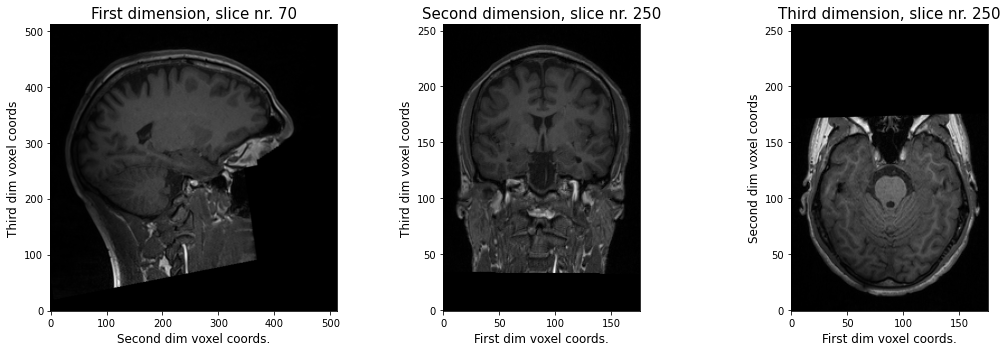

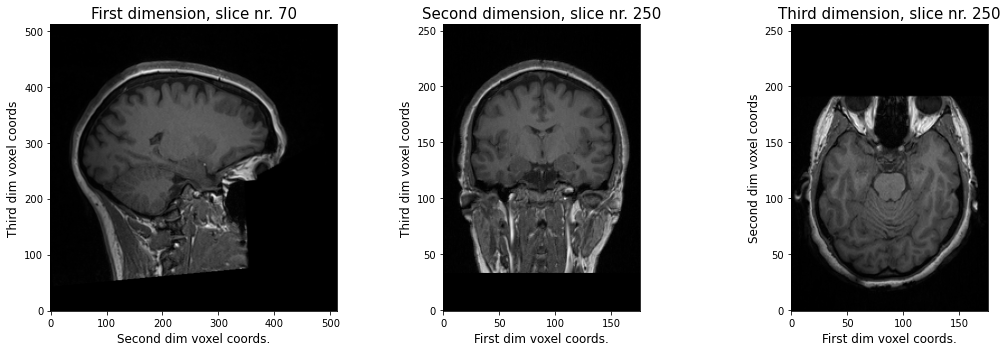

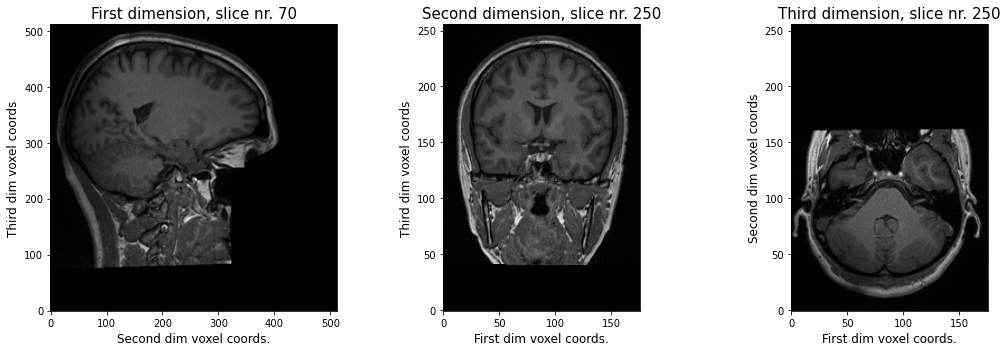

In [7]:
#Specify the particular path where the data that is wanted to be study is placed on your computer. 
#data_folder = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project'
#data_folder = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen'
data_folder = 'C:/Users/Alex/Documents/UPC/Q2/Neuroimatge/Final Project/ds002336-download'
Anatomical_representation (data_folder,[101,106,109])



Regarding the anatomical information...  __(FALTA COMPLETAR)__

# fMRI

 __(FALTA UN POCO DE INTRODUCCIÓN AQUI)__ 

## Single subject and single protocol file (eegfmriNF) analysis

Epi plot from fMRI mean image


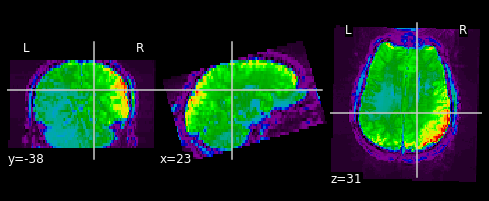

In [96]:
subject_data = 'C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/sub-xp101/func/sub-xp101_task-eegfmriNF_bold.nii.gz'
#subject_data = '/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/sub-xp101/func/sub-xp101_task-eegfmriNF_bold.nii.gz'

fmri_img= nib.load(subject_data)
mean_img = image.mean_img(fmri_img)
mask = masking.compute_epi_mask(mean_img)

#After computing the mask and the mean image, fmri-img is rewritten in numpy format
fmri_img, affine, img = load_nifti(subject_data , return_img=True)

print('Epi plot from fMRI mean image')
plot_epi(mean_img);


### Task - Rest separation

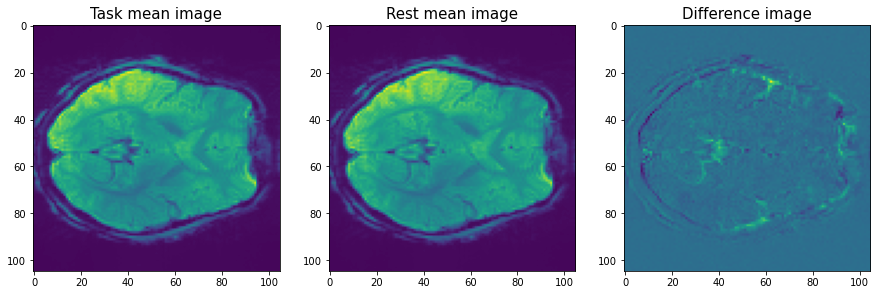

In [97]:
# Task and rest slides separated

fmri_rest=[]
fmri_rest_avg=[]
fmri_rest_todos=[]
fmri_task=[]
fmri_task_avg=[]
fmri_task_todos=[]
fmri_rest_todos_avg=np.zeros((106,106,32,10))
fmri_task_todos_avg=np.zeros((106,106,32,10))
count=0
count2=0
a=range(1,201,20)
for rest in a:
    fmri_rest_avg=fmri_img[:,:,:,rest+1:rest+9]
    fmri_rest_mean_avg=np.mean(fmri_rest_avg, axis=3)
    fmri_rest_todos_avg[:,:,:,count]=fmri_rest_mean_avg
    count+=1
    fmri_rest=fmri_img[:,:,:,rest:rest+10]
    if rest==1:
        fmri_rest_todos=fmri_rest
    else:
        fmri_rest_todos= np.concatenate((fmri_rest_todos,fmri_rest), axis=3)

for task in range(11,211,20):
    fmri_task_avg=fmri_img[:,:,:,task+1:task+9]
    fmri_task_mean_avg=np.mean(fmri_task_avg, axis=3)
    fmri_task_todos_avg[:,:,:,count2]=fmri_task_mean_avg
    count2+=1
    fmri_task=fmri_img[:,:,:,task:task+10]
    if task==11:
        fmri_task_todos=fmri_task
    else:
        fmri_task_todos= np.concatenate((fmri_task_todos,fmri_task), axis=3)
        
mean_img_rest_np=np.mean(fmri_rest_todos,axis=3)
mean_img_task_np=np.mean(fmri_task_todos,axis=3)
reference_image=mean_img_rest_np-mean_img_task_np

varx=slice(0, 105)
vary=slice(0, 105)
varz=14

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].imshow(mean_img_task_np[varx,vary,varz])
ax[0].set_title('Task mean image', fontsize=15)
ax[1].imshow(mean_img_rest_np[varx,vary,varz])
ax[1].set_title('Rest mean image', fontsize=15)
ax[2].imshow(reference_image[varx,vary,varz])
ax[2].set_title('Difference image', fontsize=15);
  

Not much difference is observed when looking at the individual plots of task and rest representations. However,  __(FALTA COMPLETAR)__

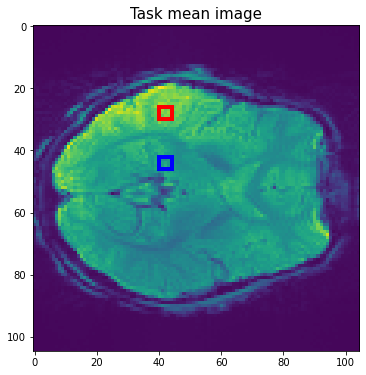

In [126]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(mean_img_task_np[varx,vary,varz])
ax.set_title('Task mean image', fontsize=15)
rect = patches.Rectangle((40, 26), 4, 4, linewidth=4, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((40, 42), 4, 4, linewidth=4, edgecolor='b', facecolor='none')
ax.add_patch(rect)
ax.add_patch(rect2)
plt.show()

The single voxel value evolution (__marked__ on the figure representation made above) is going to be presented in order to compare if visually differences can be observed between task and rest

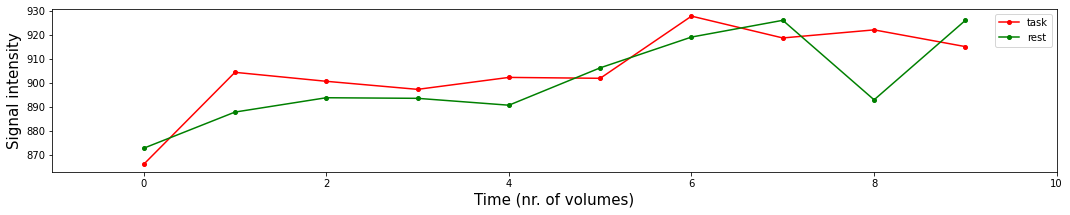

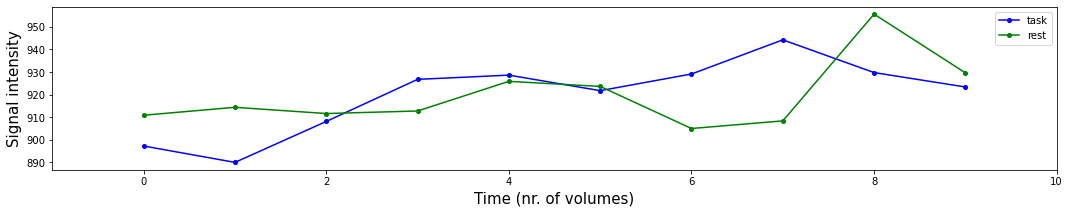

In [127]:
mid_vox_task = fmri_task_todos_avg[40, 26, 14, :]  
mid_vox_rest = fmri_rest_todos_avg[40, 26, 14, :] 

plt.figure(figsize=(18, 3))
plt.plot(mid_vox_task, 'o-', ms=4, color='r', label='task')
plt.plot(mid_vox_rest, 'o-', ms=4, color='g', label='rest')
plt.xlim(-1, mid_vox_ts.size)
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of volumes)', fontsize=15)
plt.legend()
plt.show()

mid_vox_task = fmri_task_todos_avg[40, 42, 14, :]  
mid_vox_rest = fmri_rest_todos_avg[40, 42, 14, :] 

plt.figure(figsize=(18, 3))
plt.plot(mid_vox_task, 'o-', ms=4, color='b', label='task')
plt.plot(mid_vox_rest, 'o-', ms=4, color='g', label='rest')
plt.xlim(-1, mid_vox_ts.size)
plt.ylabel('Signal intensity', fontsize=15)
plt.xlabel('Time (nr. of volumes)', fontsize=15)
plt.legend()
plt.show()

__(FALTA COMPLETAR con expliación del gráfico)__

### Extracting regions of activation

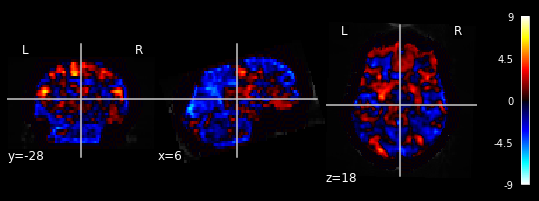

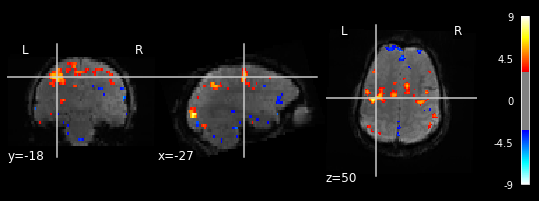

In [115]:
fmri_img = nib.load(subject_data)
mean_img = image.mean_img(fmri_img)
mask = masking.compute_epi_mask(mean_img)
fmri_img = image.clean_img(fmri_img, standardize=False)
fmri_img = image.smooth_img(fmri_img, 5.)

events_ = pd.read_table('C:/Users/vctrf/Documents/Quatrimestre_2/Neuroimagen/proyecto Neuroimagen/task-eegfmriNF_events.tsv')
#events_ = pd.read_table('/Users/juliagarciacornet/Desktop/Q4/Neuroimatge/project/task-eegfmriNF_events.tsv')
del events_['stim_file']
events=events_.replace({'Task-NF':'Task'})

tr = 2  # repetition time of MRI scans is 2 seconds
n_scans = fmri_img.shape[3]  
frame_times = np.arange(n_scans) * tr  # here are the correspoding frame times

hrf_model = 'spm'
X1 = make_first_level_design_matrix(frame_times, events, drift_model='Cosine',
                                    hrf_model=hrf_model)
fmri_glm = FirstLevelModel(signal_scaling=False, mask_img=mask, minimize_memory=False)
fmri_glm = fmri_glm.fit(fmri_img, design_matrices=X1)

z_map = fmri_glm.compute_contrast('Task- Rest')
plotting.plot_stat_map(z_map, bg_img=mean_img);
plotting.plot_stat_map(z_map, bg_img=mean_img, threshold=3.1)

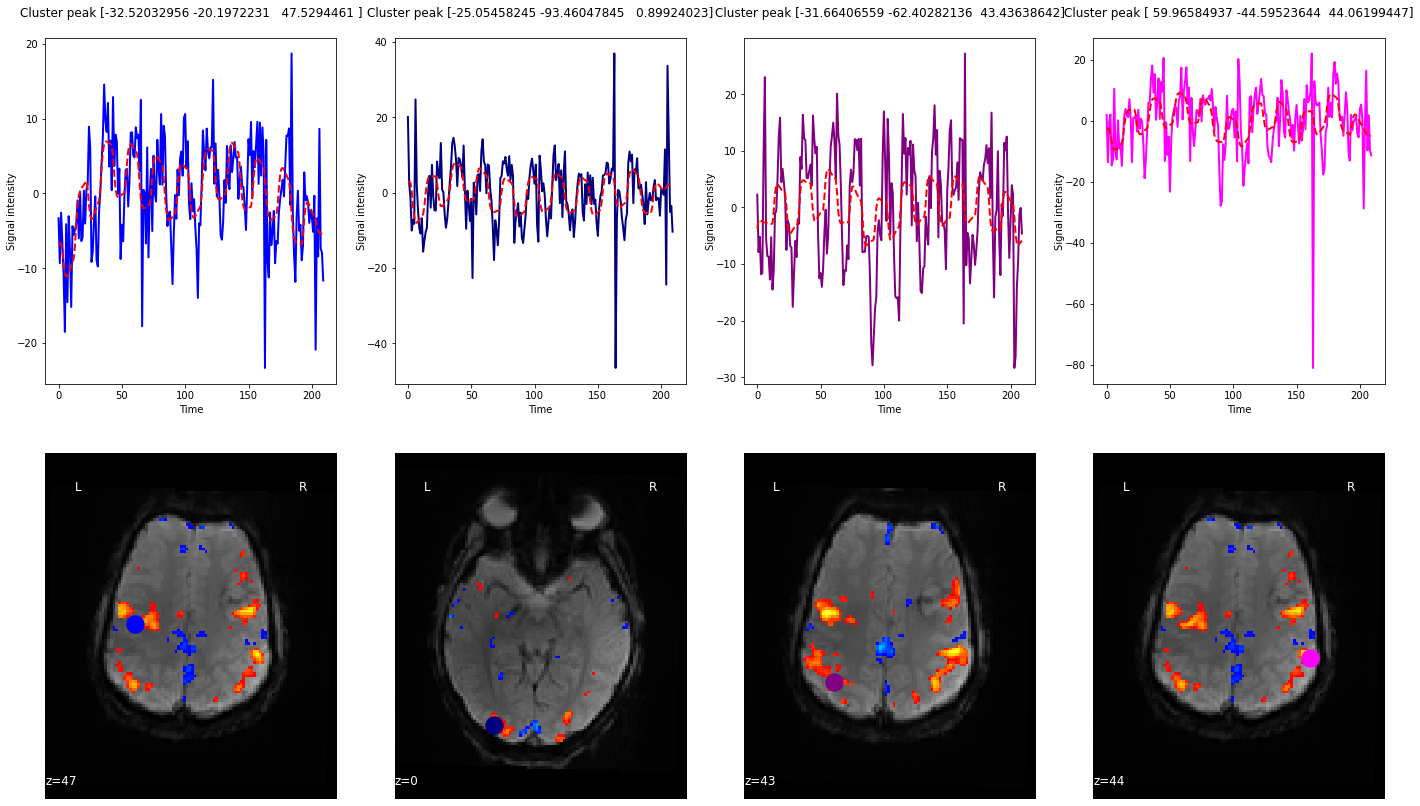

In [114]:
table = get_clusters_table(z_map, stat_threshold=3.1,
                           cluster_threshold=20).set_index('Cluster ID', drop=True)
# get the 4 largest clusters' max x, y, and z coordinates
coords = table.loc[range(1,5), ['X', 'Y', 'Z']].values
# extract time series from each coordinate
masker = input_data.NiftiSpheresMasker(coords)
real_timeseries = masker.fit_transform(fmri_img)
# The predicted time series was also extracted with GLM, it is useful to assess the quality of the model fit.
predicted_timeseries = masker.fit_transform(fmri_glm.predicted[0])

# colors for each of the clusters
colors = ['blue', 'navy', 'purple', 'magenta']
# plot the time series and corresponding locations
fig1, axs1 = plt.subplots(2, 4)
for i in range(0, 4):
    # plotting time series
    axs1[0, i].set_title('Cluster peak {}\n'.format(coords[i]))
    axs1[0, i].plot(real_timeseries[:, i], c=colors[i], lw=2)
    axs1[0, i].plot(predicted_timeseries[:, i], c='r', ls='--', lw=2)
    axs1[0, i].set_xlabel('Time')
    axs1[0, i].set_ylabel('Signal intensity', labelpad=0)
    # plotting image below the time series
    roi_img = plotting.plot_stat_map(
        z_map, cut_coords=[coords[i][2]], threshold=3.1, figure=fig1,
        axes=axs1[1, i], display_mode='z', colorbar=False, bg_img=mean_img)
    roi_img.add_markers([coords[i]], colors[i], 300)
fig1.set_size_inches(24, 14)


__(FALTA COMPLETAR con expliación de lo que se esta haciendo)__

### Atlas and correlation matrix 

### Classification report

## All subjects and protocol files analysis

# EEG

## Importing data

In [8]:
data_raw=mne.io.read_raw_brainvision('C:/Users/Alex/Documents/UPC/Q2/Neuroimatge/Final Project/ds002336-download/sub-xp101/eeg/sub-xp101_task-motorloc_eeg.vhdr')

Extracting parameters from C:/Users/Alex/Documents/UPC/Q2/Neuroimatge/Final Project/ds002336-download/sub-xp101/eeg/sub-xp101_task-motorloc_eeg.vhdr...
Setting channel info structure...


In [2]:
data=mne.io.read_raw_brainvision('C:/Users/Alex/Documents/UPC/Q2/Neuroimatge/Final Project/ds002336-download/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr',preload=True)

Extracting parameters from C:/Users/Alex/Documents/UPC/Q2/Neuroimatge/Final Project/ds002336-download/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr...
Setting channel info structure...
Reading 0 ... 67387  =      0.000 ...   336.935 secs...


C:\Users\Alex\AppData\Local\Temp\ipykernel_21896\2777862424.py:1: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  data=mne.io.read_raw_brainvision('C:/Users/Alex/Documents/UPC/Q2/Neuroimatge/Final Project/ds002336-download/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr',preload=True)
C:\Users\Alex\AppData\Local\Temp\ipykernel_21896\2777862424.py:1: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  data=mne.io.read_raw_brainvision('C:/Users/Alex/Documents/UPC/Q2/Neuroimatge/Final Project/ds002336-download/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr',preload=True)


## Visualizing the loaded data

In [3]:
%matplotlib tk 
#for some reason this is needed for the data to plot properly

In [ ]:
data_raw.plot()

In [ ]:
data.plot()

## Further Preprocessing

### Filters & Reference

In [4]:
data_filt=data.copy().load_data().filter(0.1,30)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (33.005 sec)



In [5]:
for i in [20,22,24,26,34,40,42,48]:
    print(data.ch_names[i])
#names of the reference channels of the EEG used by the authors in their laplacian filter

FC1
CP1
FC5
CP5
C1
FC3
CP3
C5


In [6]:
data_reref=data_filt.copy().set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


### Events

In [7]:
events=mne.events_from_annotations(data_reref)
events 

Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  1', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART']


(array([[    0,     0, 99999],
        [ 2230,     0,  1128],
        [ 2249,     0, 10001],
        ...,
        [67030,     0,  1128],
        [67075,     0, 10001],
        [67227,     0, 10001]]),
 {'New Segment/': 99999,
  'Pulse Artifact/R': 10001,
  'Response/R128': 1128,
  'Stimulus/S  1': 1,
  'Stimulus/S 99': 99,
  'TPULSE/TEND': 10002,
  'TPULSE/TPEAK': 10003,
  'TPULSE/TSTART': 10004})

In [9]:
#Create a new channel called stimulation (STI) needed to add the events
stim=mne.create_info(['STI'],200,['stim'])
stim_raw=mne.io.RawArray(np.zeros([1,67388]),stim)
data_reref.load_data().add_channels([stim_raw],force_update_info=True)
data_reref.ch_names[-1]

Creating RawArray with float64 data, n_channels=1, n_times=67388
    Range : 0 ... 67387 =      0.000 ...   336.935 secs
Ready.


'STI'

In [10]:
data_reref.add_events(events[0],stim_channel='STI',replace=True) #add the events to the data

## Epochs

In [11]:
event_id = {'task':1,'rest':99}
tmin = 2  # start of each epoch 
tmax = 18  # end of each epoch 
baseline = (2, 3) 

In [12]:
reject_criteria = dict(eeg=600e-5)      
picks = mne.pick_types(data_reref.info, meg=False, eeg=True, stim=False, misc=True,
                       include=[])

In [13]:
epochs = mne.Epochs(data_reref, events[0], event_id, tmin, tmax, picks=picks, proj=False,
                    baseline=baseline, reject=reject_criteria)

Not setting metadata
15 matching events found
Applying baseline correction (mode: mean)


In [14]:
epochs.plot()

Using data from preloaded Raw for 15 events and 3201 original time points ...
0 bad epochs dropped
Using data from preloaded Raw for 15 events and 3201 original time points ...
Using qt as 2D backend.
Opening epochs-browser...
Using data from preloaded Raw for 15 events and 3201 original time points ...
Using data from preloaded Raw for 1 events and 3201 original time points ...
Using data from preloaded Raw for 1 events and 3201 original time points ...
Using data from preloaded Raw for 1 events and 3201 original time points ...
Using data from preloaded Raw for 1 events and 3201 original time points ...
Using data from preloaded Raw for 1 events and 3201 original time points ...
Using data from preloaded Raw for 1 events and 3201 original time points ...
Using data from preloaded Raw for 1 events and 3201 original time points ...
Using data from preloaded Raw for 1 events and 3201 original time points ...
Using data from preloaded Raw for 6 events and 3201 original time points ...
Us

## Evoked potential

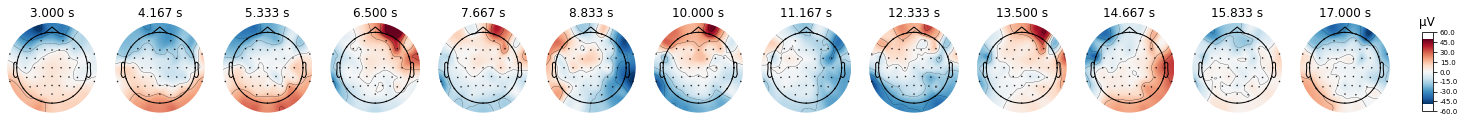

In [15]:
evoked = epochs['task'].average() #mean of the epochs to get the evoked response
evoked.plot(time_unit='s', gfp=True) #plot of the evoked response
evoked.plot_topomap(times=np.linspace(3, 17, 13), ch_type='eeg',time_unit='s') #topomap

## A new approach

In [16]:
epochs2= mne.make_fixed_length_epochs(data_reref.copy().crop(tmin=32, tmax=51))

Not setting metadata
19 matching events found
No baseline correction applied
0 projection items activated


In [17]:
epochs2.load_data().plot()

Using data from preloaded Raw for 19 events and 200 original time points ...
0 bad epochs dropped
Opening epochs-browser...


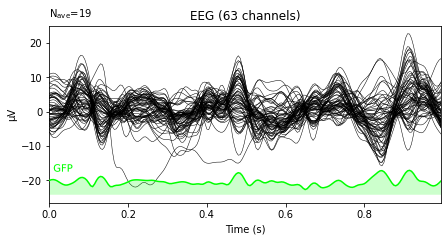

In [18]:
evoked2 = epochs2.average() #mean of the epochs to get the evoked response
evoked2.plot(time_unit='s', gfp=True) #plot of the evoked response